# Text Analytics in Social Media / Wall Street Comments

##### importing libraries

In [ ]:
import pandas as pd
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.util import ngrams
from sklearn.cluster import KMeans

##### importing datasets

In [ ]:
#df_sm = pd.read_csv(r'C:\Users\Leonardo Luchetti\Documents\Fordham Datasets\GA - social media.csv')
df_ws = pd.read_csv(r'C:\Users\Leonardo Luchetti\Documents\Fordham Datasets\GA - wall st.csv')

In [ ]:
df_ws

,comment,keyword
0,"<blockquote>For example, people with shorter c...",artificial intelligence
1,This whole article reflects the rot in the WSJ...,artificial intelligence
2,Maybe the Journal can take the time to explain...,artificial intelligence
3,(Douglas Levene),artificial intelligence
4,The more they have to tweak the data to make t...,artificial intelligence
...,...,...
4392,I'll tell you where it is/could be useful is b...,facial recognition
4393,That's it! Wouldn't its be ironically humorou...,facial recognition
4394,"Yes Jacob. And to the Progressives doing it, i...",facial recognition
4395,Thus far we haven't reacted as consumers to th...,facial recognition


# WSJ Analysis

## Frequencies

##### word frequencies

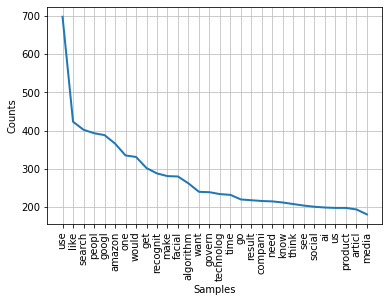

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:
#creating list with content
text_list = [i for i in df_ws['comment']]

#creating string with content
text_string = ''
text_string = text_string.join(text_list)

#tokenizing words
words = nltk.word_tokenize(text_string)

#removing capital letters
words = [i.lower() for i in words]

#removing non-letter tokens
words = [i for i in words if i.isalpha()]

#downloading stopwords
stopwords = stopwords.words('english')

#retreiving words that are not stopwords
nonstopwords_words = [i for i in words if i not in stopwords]

#lemmatization
porter = nltk.PorterStemmer()
stem = [porter.stem(i) for i in nonstopwords_words]

#getting new word frequency
freq_nw = FreqDist(stem)

#ranking new words
sorted_freq_nw = sorted(freq_nw.items(),key = lambda k:k[1], reverse = True)

#printing graph
freq_nw.plot(30)

##### adjective frequencies

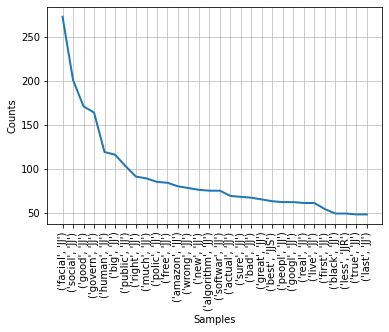

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:
#

POS_tags = nltk.pos_tag(stem)

#generating nouns forms
POS_tag_list = [(word,tag) for (word,tag) in POS_tags if tag.startswith('J')]

#getting frequency distribution
freq_tags = nltk.FreqDist(POS_tag_list)

#ranking new words
sorted_freq_tags = sorted(freq_tags.items(),key = lambda k:k[1], reverse = True)

#pringing graph
freq_tags.plot(30)

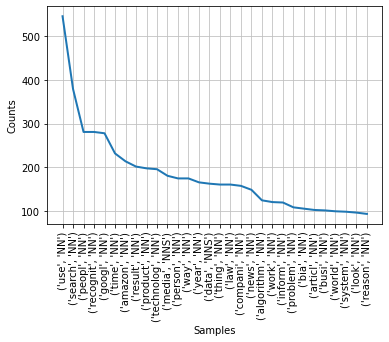

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:


#generating nouns forms
POS_tag_list = [(word,tag) for (word,tag) in POS_tags if tag.startswith('N')]

#getting frequency distribution
freq_tags = nltk.FreqDist(POS_tag_list)

#ranking new words
sorted_freq_tags = sorted(freq_tags.items(),key = lambda k:k[1], reverse = True)

#pringing graph
freq_tags.plot(30)

##### frequencies of each keyword

separating dataframes

In [ ]:
ai_df = df_ws[df_ws['keyword'] == 'artificial intelligence']
ml_df = df_ws[df_ws['keyword'] == 'machine learning']
al_df = df_ws[df_ws['keyword'] == 'algorithms']
fr_df = df_ws[df_ws['keyword'] == 'facial recognition']

getting frequencies

In [ ]:
def content_words(dataframe):
    content_counts = list()
        #creating list with content
    text_list = [i for i in dataframe['comment']]
    text_string = ''
        #joining all comments into a string
    text_string = text_string.join(text_list)
        #tokenizing words
    words = nltk.word_tokenize(text_string)
        #updating to lower case
    words_lower = [i.lower() for i in words]
        #retrieving non stopwords
    words1 = [i for i in words_lower if i not in stopwords]
        #retrieving only lettered-words
    words2 = [i for i in words1 if i.isalpha()]
        #retrieving words after lemmatization
    words3 = [porter.stem(i) for i in words2]
        #tagging POS tags
    POS_tags = nltk.pos_tag(words3)
        #adding tags
    POS_tag_list = [(word,tag) for (word,tag) in POS_tags if tag.startswith('J')]
        #adding new list to old list
    content_counts += POS_tag_list
    return content_counts

ai_words = content_words(ai_df)
ml_words = content_words(ml_df)
al_words = content_words(al_df)
fr_words = content_words(fr_df)

ranking results

In [ ]:
def freq_words(dict_contains):
    keywords_freq = FreqDist(dict_contains)
    keywords_freq = sorted(keywords_freq.items(),key = lambda k:k[1], reverse = True)
    keywords_freq = keywords_freq[0:20]
    return keywords_freq

ai_freq = freq_words(ai_words)
ml_freq = freq_words(ml_words)
al_freq = freq_words(al_words)
fr_freq = freq_words(fr_words)

In [ ]:
df_words = pd.DataFrame({'AI':pd.Series(ai_freq),'ML':pd.Series(ml_freq),'algorithms':pd.Series(al_freq),'facial recognition':pd.Series(fr_freq)})

df_words

,AI,ML,algorithms,facial recognition
0,"((softwar, JJ), 37)","((human, JJ), 34)","((social, JJ), 151)","((facial, JJ), 264)"
1,"((human, JJ), 32)","((new, JJ), 10)","((good, JJ), 89)","((govern, JJ), 124)"
2,"((algorithm, JJ), 23)","((short, JJ), 6)","((big, JJ), 65)","((polic, JJ), 78)"
3,"((black, JJ), 18)","((learn, JJ), 6)","((amazon, JJ), 65)","((public, JJ), 61)"
4,"((new, JJ), 17)","((ai, JJ), 6)","((googl, JJ), 61)","((good, JJ), 60)"
5,"((equal, JJ), 16)","((good, JJ), 6)","((free, JJ), 54)","((right, JJ), 46)"
6,"((good, JJ), 16)","((physic, JJ), 6)","((much, JJ), 50)","((big, JJ), 45)"
7,"((object, JJ), 16)","((moral, JJ), 4)","((algorithm, JJ), 48)","((social, JJ), 37)"
8,"((bia, JJ), 15)","((old, JJ), 4)","((best, JJS), 46)","((peopl, JJ), 36)"
9,"((ai, JJ), 15)","((direct, JJ), 4)","((bad, JJ), 39)","((wrong, JJ), 33)"


## Sentiment Analysis

In [ ]:
data = df_ws.comment.str.lower()

data

0       <blockquote>for example, people with shorter c...
1       this whole article reflects the rot in the wsj...
2       maybe the journal can take the time to explain...
3                                        (douglas levene)
4       the more they have to tweak the data to make t...
                              ...                        
4392    i'll tell you where it is/could be useful is b...
4393    that's it!  wouldn't its be ironically humorou...
4394    yes jacob. and to the progressives doing it, i...
4395    thus far we haven't reacted as consumers to th...
4396    as long as the providers make it "free", we wi...
Name: comment, Length: 4397, dtype: object

##### Bing Liu’s Lexicon

In [ ]:
#creating function for dictionary
def count_pos_neg(data, positive_dict, negative_dict):
    poscnt = []
    negcnt = []
    netcnt = []

    for nrow in range(0,len(data)):
        text = data[nrow]
        
        qa = 0
        qb = 0

        for word in positive_dict :
            if (word in text) :
                qa = qa + 1

        for word in negative_dict :
            if (word in text) :
                qb = qb + 1

        qc = qa - qb

        poscnt.append(qa)
        negcnt.append(qb)
        netcnt.append(qc)

    return (poscnt, negcnt, netcnt)

#downloading dictionary
import nltk
nltk.download("opinion_lexicon")

#import Bing Liu's dictionary
from nltk.corpus import opinion_lexicon

#retrieving positive and negative words from dict
pos_list_BL=set(opinion_lexicon.positive())
neg_list_BL=set(opinion_lexicon.negative())

#applying function to data and retrieving dataset
df_ws['poscnt_BL'], df_ws['negcnt_BL'], df_ws['netcnt_BL'] = count_pos_neg(data, pos_list_BL, neg_list_BL)

#printing results
df_ws[['comment','poscnt_BL','negcnt_BL','netcnt_BL']].head(5)

[nltk_data] Downloading package opinion_lexicon to C:\Users\Leonardo
[nltk_data]     Luchetti\anaconda3\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


,comment,poscnt_BL,negcnt_BL,netcnt_BL
0,"<blockquote>For example, people with shorter c...",2,1,1
1,This whole article reflects the rot in the WSJ...,1,2,-1
2,Maybe the Journal can take the time to explain...,2,3,-1
3,(Douglas Levene),0,0,0
4,The more they have to tweak the data to make t...,4,5,-1


##### LM dictionary

In [ ]:
#creating dictionary
def read_local_dictionary(file):
    # create dictionary list
    words_dict = []
    with open(file, "r") as f: 
        for line in f:
            t = line.strip().lower()
            words_dict.append(t)
    return words_dict

#creating variables with dictionaries
pos_list_LM = read_local_dictionary('positive-words-LM.txt')
neg_list_LM = read_local_dictionary('negative-words-LM.txt')

#applying function to reviews and retrieving results
df_ws['poscnt_LM'], df_ws['negcnt_LM'], df_ws['netcnt_LM'] = count_pos_neg(data, pos_list_LM, neg_list_LM)

#printing results
df_ws[['comment','poscnt_LM','negcnt_LM','netcnt_LM']].head(5)

,comment,poscnt_LM,negcnt_LM,netcnt_LM
0,"<blockquote>For example, people with shorter c...",0,2,-2
1,This whole article reflects the rot in the WSJ...,0,2,-2
2,Maybe the Journal can take the time to explain...,1,1,0
3,(Douglas Levene),0,0,0
4,The more they have to tweak the data to make t...,1,1,0


##### TextBlob

In [ ]:
#importing library
from textblob import TextBlob

#applying textblob to reviews column
df_ws["score_TextBlob"] = df_ws["comment"].map(lambda x:TextBlob(x).sentiment.polarity)

#printing results
df_ws[["comment","score_TextBlob"]]

,comment,score_TextBlob
0,"<blockquote>For example, people with shorter c...",0.250000
1,This whole article reflects the rot in the WSJ...,0.200000
2,Maybe the Journal can take the time to explain...,0.219048
3,(Douglas Levene),0.000000
4,The more they have to tweak the data to make t...,0.195556
...,...,...
4392,I'll tell you where it is/could be useful is b...,-0.150000
4393,That's it! Wouldn't its be ironically humorou...,0.075000
4394,"Yes Jacob. And to the Progressives doing it, i...",0.000000
4395,Thus far we haven't reacted as consumers to th...,0.248052


In [ ]:
#importing library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#creating variable for function
analyzer = SentimentIntensityAnalyzer()

#scoring df reviews
scores = [analyzer.polarity_scores(sentence) for sentence in data]

#separating results by column
neg_s = [i["neg"] for i in scores]
neu_s = [i["neu"] for i in scores]
pos_s = [i["pos"] for i in scores]
compound_s = [i["compound"] for i in scores]

#imputing results in data frame
df_ws['negscore_Vader'], df_ws['neuscore_Vader'], df_ws['posscore_Vader'], df_ws['compound_Vader'] = neg_s, neu_s, pos_s, compound_s

#printing results
df_ws[['comment','negscore_Vader','neuscore_Vader','posscore_Vader','compound_Vader']].head(5)

,comment,negscore_Vader,neuscore_Vader,posscore_Vader,compound_Vader
0,"<blockquote>For example, people with shorter c...",0.000,0.802,0.198,0.6369
1,This whole article reflects the rot in the WSJ...,0.000,0.939,0.061,0.3818
2,Maybe the Journal can take the time to explain...,0.082,0.918,0.000,-0.4082
3,(Douglas Levene),0.000,1.000,0.000,0.0000
4,The more they have to tweak the data to make t...,0.000,0.898,0.102,0.5118


#### compound df

In [ ]:
df_analysis = df_ws[['comment','netcnt_BL','netcnt_LM','score_TextBlob','compound_Vader']]

df_analysis

,comment,netcnt_BL,netcnt_LM,score_TextBlob,compound_Vader
0,"<blockquote>For example, people with shorter c...",1,-2,0.250000,0.6369
1,This whole article reflects the rot in the WSJ...,-1,-2,0.200000,0.3818
2,Maybe the Journal can take the time to explain...,-1,0,0.219048,-0.4082
3,(Douglas Levene),0,0,0.000000,0.0000
4,The more they have to tweak the data to make t...,-1,0,0.195556,0.5118
...,...,...,...,...,...
4392,I'll tell you where it is/could be useful is b...,-1,-1,-0.150000,0.2023
4393,That's it! Wouldn't its be ironically humorou...,-2,0,0.075000,-0.6251
4394,"Yes Jacob. And to the Progressives doing it, i...",2,1,0.000000,0.5080
4395,Thus far we haven't reacted as consumers to th...,-1,0,0.248052,0.8458


#### sentiment for each keyword

In [ ]:
df_analysis.mean()

netcnt_BL        -1.032067
netcnt_LM        -0.835115
score_TextBlob    0.072223
compound_Vader    0.066355
dtype: float64

# checkpoint

[Text(0, 0, 'Artificial Intelligence'),
 Text(1, 0, 'Machine Learning'),
 Text(2, 0, 'Algorithms'),
 Text(3, 0, 'Facial Recognition')]

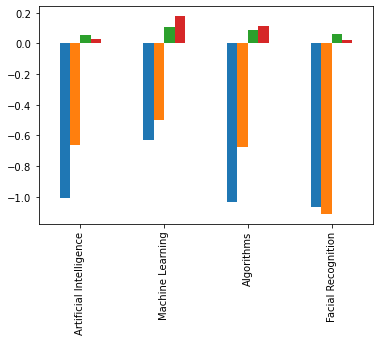

In [ ]:
#separating sentiment df by keyword
ai_df_sentiment = df_ws[df_ws['keyword'] == 'artificial intelligence']
ml_df_sentiment = df_ws[df_ws['keyword'] == 'machine learning']
al_df_sentiment = df_ws[df_ws['keyword'] == 'algorithms']
fr_df_sentiment = df_ws[df_ws['keyword'] == 'facial recognition']

#selecting columns
ai_df_sentiment = ai_df_sentiment[['comment','netcnt_BL','netcnt_LM','score_TextBlob','compound_Vader']]
ml_df_sentiment = ml_df_sentiment[['comment','netcnt_BL','netcnt_LM','score_TextBlob','compound_Vader']]
al_df_sentiment = al_df_sentiment[['comment','netcnt_BL','netcnt_LM','score_TextBlob','compound_Vader']]
fr_df_sentiment = fr_df_sentiment[['comment','netcnt_BL','netcnt_LM','score_TextBlob','compound_Vader']]

keyword_sentiment = {'ai_df_sentiment':[i for i in ai_df_sentiment.mean()],'ml_df_sentiment':[i for i in ml_df_sentiment.mean()],'al_df_sentiment':[i for i in al_df_sentiment.mean()],'fr_df_sentiment':[i for i in fr_df_sentiment.mean()]}

keyword_sentiment_df = pd.DataFrame(keyword_sentiment).T

# plot grouped bar chart
df_plot = keyword_sentiment_df.plot(kind="bar",legend=None)
df_plot.set_xticklabels(['Artificial Intelligence','Machine Learning','Algorithms','Facial Recognition'])

#### sentiment for google and amazon

In [ ]:
#creating function to retrieve text with a specific keyword
def comments_with(keyword):
    
    #creating list for words
    text_list = list()
    
    #creating list with content
    for i in range(0,len(df_ws)):
        if keyword in df_ws['comment'][i]:
            text_list.append(df_ws['comment'][i])

    data = [i.lower() for i in text_list]
    
    text_string = ''
    text_string = text_string.join(data)
    
    return(text_string)

#applying function to google and amazon
amazon_com = comments_with('Amazon')
google_com = comments_with('Google')

In [ ]:
#applying textblob to reviews column
def sentimenting(var):
    blob = TextBlob(var).sentiment
    vad = [analyzer.polarity_scores(var)]
    
    return({'TextBlob':blob,'VADER':vad})

amazon_sentiment = sentimenting(amazon_com)
google_sentiment = sentimenting(google_com)

print(amazon_sentiment)
print(google_sentiment)

{'TextBlob': Sentiment(polarity=0.10565338878689662, subjectivity=0.466520157271466), 'VADER': [{'neg': 0.081, 'neu': 0.757, 'pos': 0.162, 'compound': 1.0}]}
{'TextBlob': Sentiment(polarity=0.10417302680735521, subjectivity=0.4662106550166254), 'VADER': [{'neg': 0.083, 'neu': 0.801, 'pos': 0.116, 'compound': 0.9999}]}


## n-grams

In [ ]:
def retrieve_ngrams(data,number,quant):
    #tokenizing words
    words = nltk.word_tokenize(data)

    #removing capital letters
    words = [i.lower() for i in words]

    #removing non-letter tokens
    words = [i for i in words if i.isalpha()]
    
    #downloading stopwords
    from nltk.corpus import stopwords
    stopwords = stopwords.words('english')

    #retreiving words that are not stopwords
    nonstopwords_words = [i for i in words if i not in stopwords]

    #lemmatization
    porter = nltk.PorterStemmer()
    stem = [porter.stem(i) for i in nonstopwords_words]

    # and get a list of all the bi-grams
    grams = ngrams(stem, number)
    
    #get the frequency of each bigram in text
    ranked_grams = nltk.FreqDist(grams)

    #ten most popular ngrams
    n_freq = ranked_grams.most_common(quant)
    
    #returning list
    return(n_freq)

#### general n-grams

In [ ]:
#generating on two ngrams 
two = comments_with('')
two = retrieve_ngrams(two,2,10)

#generating on three ngrams 
three = comments_with('')
three = retrieve_ngrams(three,3,10)

df_ng = pd.DataFrame({'Two':pd.Series(two),'Three':pd.Series(three)})

df_ng

,Two,Three
0,"((facial, recognit), 250)","((use, facial, recognit), 41)"
1,"((social, media), 135)","((facial, recognit, technolog), 24)"
2,"((search, engin), 67)","((facial, recognit, softwar), 21)"
3,"((search, result), 63)","((facial, recognit, use), 14)"
4,"((law, enforc), 56)","((wall, street, journal), 13)"
5,"((use, facial), 44)","((googl, search, result), 10)"
6,"((googl, search), 38)","((social, media, platform), 8)"
7,"((year, ago), 37)","((trust, news, sourc), 8)"
8,"((big, tech), 33)","((facial, recognit, system), 8)"
9,"((use, technolog), 29)","((licens, plate, reader), 7)"


#### special n grams

In [ ]:
def special_ngrams(dt,number,quant,key):
    #tokenizing words
    words = nltk.word_tokenize(dt)

    #removing capital letters
    words = [i.lower() for i in words]

    #removing non-letter tokens
    words = [i for i in words if i.isalpha()]
    
    #downloading stopwords
    from nltk.corpus import stopwords
    stopwords = stopwords.words('english')

    #retreiving words that are not stopwords
    nonstopwords_words = [i for i in words if i not in stopwords]

    #lemmatization
    porter = nltk.PorterStemmer()
    stem = [porter.stem(i) for i in nonstopwords_words]

    # and get a list of all the bi-grams
    grams = ngrams(stem, number)
    
    #only retrieving keywords
    grams = [i for i in grams if key in i]
    
    #get the frequency of each bigram in text
    ranked_grams = nltk.FreqDist(grams)

    #ten most popular ngrams
    n_freq = ranked_grams.most_common(quant)
    
    #returning list
    return(n_freq)

#### specific adjectives (2-n-grams)

In [ ]:
#getting data
data = comments_with('')

#list of words to generate
keys_for_ng = ['good','wrong','moral','great','social','free','best','bad','right']

#creating df
df_adj2 = pd.DataFrame()

#generating on two ngrams 
for i in keys_for_ng:
    all_keys = special_ngrams(data,2,5,i)
    df_adj2[i] = all_keys
    
df_adj2

,good,wrong,moral,great,social,free,best,bad,right
0,"((good, reason), 9)","((go, wrong), 6)","((alreadi, moral), 3)","((great, countri), 5)","((social, media), 135)","((free, speech), 11)","((best, interest), 5)","((bad, thing), 13)","((right, privaci), 9)"
1,"((good, luck), 7)","((right, wrong), 5)","((moral, sens), 2)","((said, great), 2)","((social, justic), 10)","((free, market), 6)","((return, best), 3)","((bad, peopl), 6)","((privaci, right), 8)"
2,"((good, articl), 5)","((noth, wrong), 4)","((call, moral), 1)","((great, potenti), 2)","((use, social), 7)","((time, free), 3)","((best, search), 3)","((peopl, bad), 6)","((right, peopl), 7)"
3,"((good, thing), 5)","((someth, wrong), 3)","((moral, social), 1)","((googl, great), 2)","((social, credit), 7)","((make, free), 3)","((best, price), 3)","((good, bad), 4)","((right, wing), 6)"
4,"((good, bad), 4)","((anyth, wrong), 3)","((think, moral), 1)","((great, articl), 2)","((social, platform), 4)","((feel, free), 3)","((best, custom), 3)","((bad, actor), 3)","((constitut, right), 5)"


#### specific adjectives (3-n-grams)

In [ ]:
#getting data
data = comments_with('')

#list of words to generate
keys_for_ng = ['good','wrong','moral','great','social','free','best','bad','right']

#creating df
df_adj3 = pd.DataFrame()

#generating on two ngrams 
for i in keys_for_ng:
    all_keys = special_ngrams(data,3,5,i)
    df_adj3[i] = all_keys
    
df_adj3

,good,wrong,moral,great,social,free,best,bad,right
0,"((bound, good, legal), 3)","((possibl, go, wrong), 3)","((babi, alreadi, moral), 2)","((chang, trajectori, great), 2)","((social, media, platform), 8)","((live, googl, free), 2)","((best, print, news), 2)","((peopl, bad, thing), 5)","((right, peopl, secur), 5)"
1,"((good, legal, protect), 3)","((prove, other, wrong), 2)","((alreadi, moral, sens), 2)","((trajectori, great, countri), 2)","((use, social, media), 6)","((data, bia, free), 1)","((return, best, search), 2)","((bad, peopl, bad), 4)","((right, due, process), 3)"
2,"((make, feel, good), 2)","((other, wrong, fact), 2)","((without, call, moral), 1)","((great, countri, without), 2)","((social, media, account), 6)","((bia, free, nabe), 1)","((best, search, result), 2)","((bad, thing, white), 4)","((order, dissemin, right), 2)"
3,"((good, bad, ugli), 2)","((wrong, fact, reason), 2)","((call, moral, social), 1)","((articl, goe, great), 2)","((social, media, compani), 6)","((free, nabe, x), 1)","((compani, principl, best), 2)","((bad, thing, internet), 3)","((dissemin, right, wrong), 2)"
4,"((sound, like, good), 2)","((dissemin, right, wrong), 2)","((moral, social, limit), 1)","((far, great, opportun), 2)","((social, media, site), 5)","((word, time, free), 1)","((principl, best, custom), 2)","((say, bad, thing), 2)","((right, wrong, default), 2)"


#### specific nouns

In [ ]:
#getting data
data = comments_with('')

#list of words to generate
keys_for_ng = ['amazon','googl']

#creating df
df_adj2 = pd.DataFrame()

#generating on two ngrams 
for i in keys_for_ng:
    all_keys = special_ngrams(data,2,5,i)
    df_adj2[i] = all_keys
    
df_adj2

,amazon,googl
0,"((amazon, search), 12)","((googl, search), 38)"
1,"((use, amazon), 12)","((use, googl), 25)"
2,"((like, amazon), 9)","((googl, use), 13)"
3,"((amazon, choic), 9)","((like, googl), 12)"
4,"((amazon, make), 8)","((googl, facebook), 8)"


## clustering

In [ ]:
#normalizing data

#retrieving df with relevant info
df_clust = df_ws[['poscnt_BL','negcnt_BL','poscnt_LM','negcnt_LM']]

#selecting variables
nvars = ['poscnt_BL','negcnt_BL','poscnt_LM','negcnt_LM']

#standardizing values
df_clust[nvars] = (df_clust[nvars] - df_clust[nvars].mean())/df_clust[nvars].std()

#creating array with positive and negative words
arr = df_clust.to_numpy()

C:\Users\Leonardo Luchetti\anaconda3\lib\site-packages\pandas\core\frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


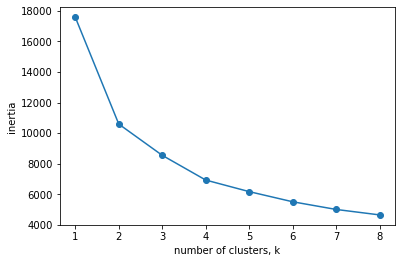

In [ ]:
ks = range(1,9)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(arr)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

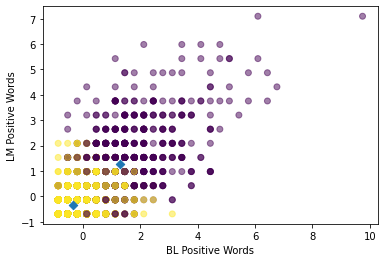

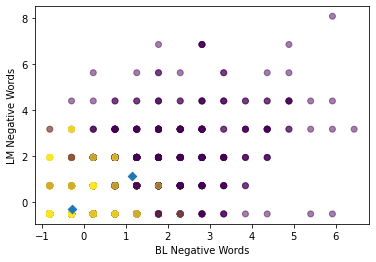

In [ ]:
#creating number of clusters
model = KMeans(n_clusters=2)

#fitting model
model.fit(arr)

#predicting labels
labels = model.predict(arr)

#plotting positive words
#selecting array to graph
xs  = arr[:,1]
ys = arr[:,3]

plt.scatter(xs,ys,c=labels,alpha=0.5)

#assigning centers
centers = model.cluster_centers_

center_x = centers[:,1]
center_y = centers[:,3]

plt.scatter(center_x,center_y,marker='D')
plt.xlabel("BL Positive Words")
plt.ylabel("LM Positive Words")
plt.show()

#plotting negative words
#selecting array to graph
xs  = arr[:,0]
ys = arr[:,2]

plt.scatter(xs,ys,c=labels,alpha=0.5)

#assigning centers
centers = model.cluster_centers_

center_x = centers[:,2]
center_y = centers[:,2]

plt.scatter(center_x,center_y,marker='D')
plt.xlabel("BL Negative Words")
plt.ylabel("LM Negative Words")
plt.show()

#### t-sne

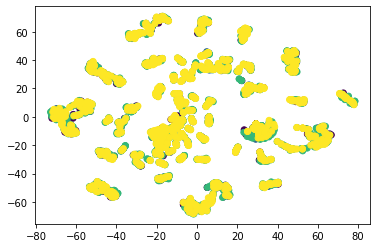

In [ ]:
from sklearn.manifold import TSNE

#creating variables from dataset
samples = df_analysis[['netcnt_BL','netcnt_LM','score_TextBlob','compound_Vader']]
ks = df_ws['keyword']

#getting clusters
for i in range(0,len(ks)):
    if ks[i] == 'artificial intelligence':
        ks[i] = 0
    elif ks[i] == 'machine learning':
        ks[i] = 1
    elif ks[i] == 'algorithms':
        ks[i] = 2
    elif ks[i] == 'facial recognition':
        ks[i] = 3
cls = [i for i in ks]

#creating model
model=TSNE(learning_rate=100)

#transforming the variables into a two-variable dataset
transformed = model.fit_transform(samples)
xs = transformed[:,0]
ys = transformed[:,1]

#plotting results
plt.scatter(xs,ys,c=cls)
plt.show()

## tableau

In [ ]:
df_tableau = df_ws[['keyword','netcnt_BL','netcnt_LM','score_TextBlob','compound_Vader']]

df_tableau.to_csv('sentiment for comments.csv')

# Next Steps
- add washington post, financial times, social media (rerun to see new results)
- see ny times output with combined keywords
- LDA analysis
- Apply text analytics lab 3
- Compare n grams for keywords